<a href="https://colab.research.google.com/github/Sanjeeviit/Business-Analytics/blob/main/BAWEEK2CHISQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tutorial on Overview of Chisquare GOF FOR UNIFORM DISTRIBUTION

In [3]:
import numpy as np
import pandas as pd
df = pd.read_excel('/content/data_Uniform.xlsx')
print(df.head())
print (df.shape)

         obs
0  54.507318
1  52.183131
2  59.587585
3  52.951728
4  53.302821
(51, 1)


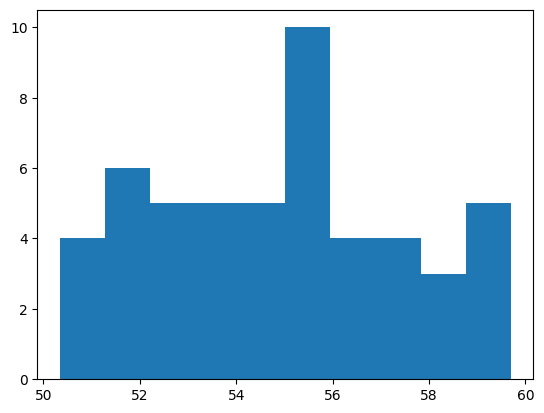

In [4]:
import matplotlib.pyplot as plt
plt.hist(df['obs'])
plt.show()

In [5]:
df.describe()

,obs
count,51.000000
mean,54.931441
std,2.633428
min,50.340227
25%,52.979121
50%,55.079462
75%,56.820487
max,59.695597


In [6]:
stats_labels = ['Variance Observed' , 'Skew Observed', 'Kurt Observed']
stats_values = [round(df['obs'].var(), 2), round(df['obs'].skew(),2), round(df['obs'].kurt(),2)]
print(set(zip(stats_labels,stats_values)))

{('Kurt Observed', -0.83), ('Variance Observed', 6.93), ('Skew Observed', 0.18)}


In [7]:
# stats package
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import norm ,uniform,poisson
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import chisquare
from scipy.stats import chi2



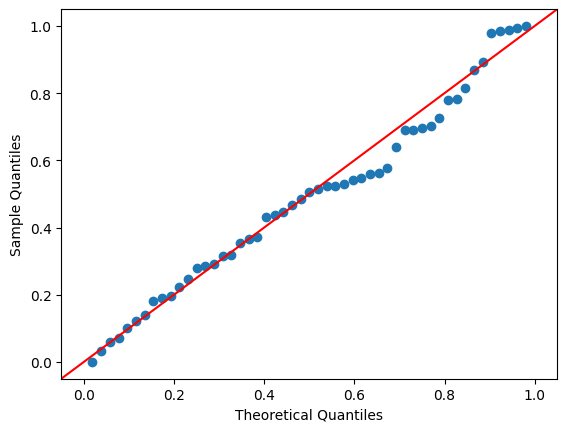

In [8]:
# QQ Plot tails
sm.qqplot(df['obs'],stats.uniform, fit = True, line ='45')
plt.show()

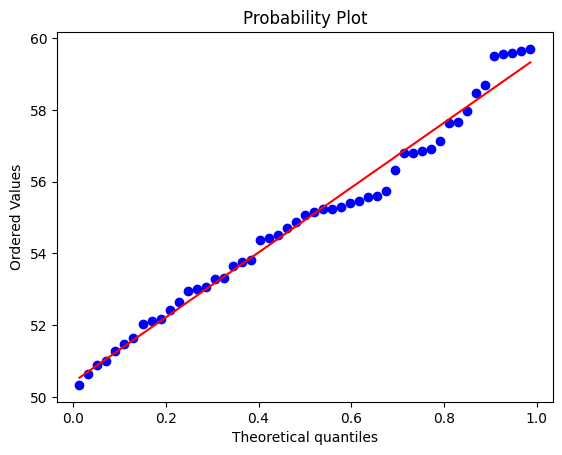

In [9]:
# PP Plot center
stats.probplot(df['obs'],dist='uniform',plot=plt)
plt.show()

In [ ]:
# Null Hypothesis given data follows uniform distribution
# Alternate Hypothesis given data do not follows uniform distribution

In [10]:
df['Bins'] = pd.cut(df['obs'], bins =10)
print(df)

          obs              Bins
0   54.507318  (54.082, 55.018]
1   52.183131  (51.276, 52.211]
2   59.587585   (58.76, 59.696]
3   52.951728  (52.211, 53.147]
4   53.302821  (53.147, 54.082]
5   54.383157  (54.082, 55.018]
6   55.394090  (55.018, 55.953]
7   59.637172   (58.76, 59.696]
8   53.811463  (53.147, 54.082]
9   52.035259  (51.276, 52.211]
10  53.763910  (53.147, 54.082]
11  59.488890   (58.76, 59.696]
12  56.798223  (55.953, 56.889]
13  55.727858  (55.018, 55.953]
14  54.434550  (54.082, 55.018]
15  55.162684  (55.018, 55.953]
16  51.287706  (51.276, 52.211]
17  54.884016  (54.082, 55.018]
18  50.340227  (50.331, 51.276]
19  51.009715  (50.331, 51.276]
20  53.006514  (52.211, 53.147]
21  52.653531  (52.211, 53.147]
22  56.323987  (55.953, 56.889]
23  51.467548  (51.276, 52.211]
24  56.900738  (56.889, 57.825]
25  58.482138   (57.825, 58.76]
26  57.659965  (56.889, 57.825]
27  57.974599   (57.825, 58.76]
28  52.115398  (51.276, 52.211]
29  55.079462  (55.018, 55.953]
30  50.6

In [11]:
# CHI-Count no of observation in each bins
df_2 = pd.DataFrame()
df_2['Observed Frequency'] = (df.groupby('Bins').count())
df_2

,Observed Frequency
Bins,
"(50.331, 51.276]",4
"(51.276, 52.211]",6
"(52.211, 53.147]",5
"(53.147, 54.082]",5
"(54.082, 55.018]",5
"(55.018, 55.953]",10
"(55.953, 56.889]",4
"(56.889, 57.825]",4
"(57.825, 58.76]",3


In [12]:
# step3 CHI expected no of observation
mean = df_2['Observed Frequency'].mean()
df_2['Expected Frequency']= mean
df_2

,Observed Frequency,Expected Frequency
Bins,,
"(50.331, 51.276]",4,5.1
"(51.276, 52.211]",6,5.1
"(52.211, 53.147]",5,5.1
"(53.147, 54.082]",5,5.1
"(54.082, 55.018]",5,5.1
"(55.018, 55.953]",10,5.1
"(55.953, 56.889]",4,5.1
"(56.889, 57.825]",4,5.1
"(57.825, 58.76]",3,5.1


In [13]:
chisquare(df_2['Observed Frequency'],df_2['Expected Frequency'])

Power_divergenceResult(statistic=6.450980392156864, pvalue=0.6940703597580011)

In [14]:
chi2.ppf(0.95,len(df_2)-2-1)

14.067140449340169

In [1]:
# poisson
import numpy as np
import pandas as pd
df = pd.read_excel('/content/data_Poisson.xlsx')
print(df.head())
print (df.shape)

   obs
0    5
1    4
2    4
3    5
4    5
(100, 1)


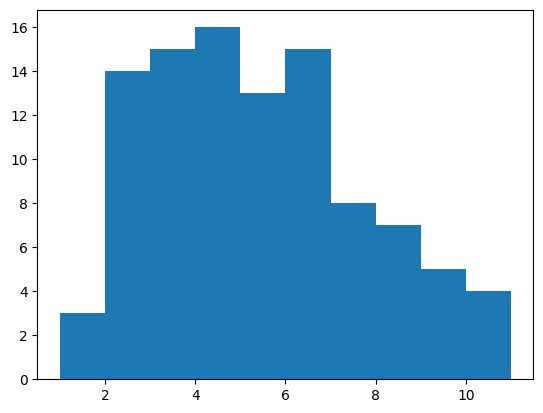

In [2]:
import matplotlib.pyplot as plt
plt.hist(df['obs'])
plt.show()

In [3]:
df.describe()

,obs
count,100.000000
mean,4.940000
std,2.381834
min,1.000000
25%,3.000000
50%,5.000000
75%,6.000000
max,11.000000


In [4]:
stats_labels = ['Variance Observed' , 'Skew Observed', 'Kurt Observed']
stats_values = [round(df['obs'].var(), 2), round(df['obs'].skew(),2), round(df['obs'].kurt(),2)]
print(set(zip(stats_labels,stats_values)))

{('Skew Observed', 0.51), ('Variance Observed', 5.67), ('Kurt Observed', -0.38)}


In [5]:
# stats package
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import norm ,uniform,poisson
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import chisquare
from scipy.stats import chi2
#new
from scipy.stats import poisson

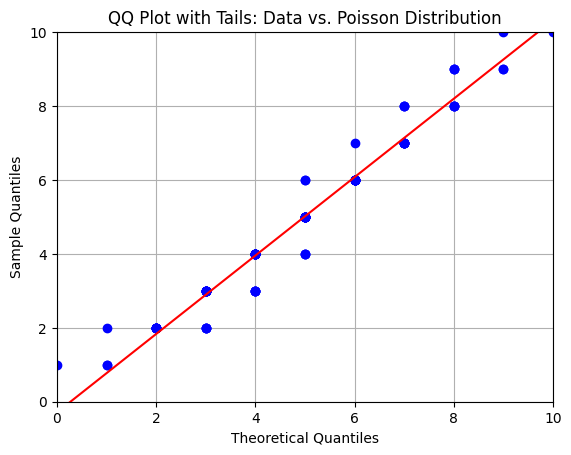

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Assuming your data is in a NumPy array named 'data'
data = df['obs'].to_numpy()  # Convert to NumPy array if needed

# Create the QQ plot with tails
fig = plt.figure()
stats.probplot(data, dist="poisson", sparams=(data.mean(),), plot=plt)  # Use estimated mean for lambda

# Customize the plot
plt.title("QQ Plot with Tails: Data vs. Poisson Distribution")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.grid(True)

# Zoom in on the tails
plt.xlim(0, 10)  # Adjust limits as needed for your data
plt.ylim(0, 10)  # Adjust limits as needed for your data

plt.show()


In [20]:
# Null Hypothesis given data follows Poisson distribution
# Alternate Hypothesis given data do not follows Poisson distribution

In [21]:
# creating new data frame
grouped_df = pd.DataFrame()
print(grouped_df)

Empty DataFrame
Columns: []
Index: []


In [22]:
grouped_df['Observed Frequency'] = df.groupby('obs')['obs'].count()
print(grouped_df)

     Observed Frequency
obs                    
1                     3
2                    14
3                    15
4                    16
5                    13
6                    15
7                     8
8                     7
9                     5
10                    2
11                    2


In [23]:
grouped_df['Poisson_PMF'] = poisson.pmf(k=grouped_df.index,mu=df['obs'].mean())
print(grouped_df)


     Observed Frequency  Poisson_PMF
obs                                 
1                     3     0.035344
2                    14     0.087299
3                    15     0.143752
4                    16     0.177534
5                    13     0.175404
6                    15     0.144416
7                     8     0.101916
8                     7     0.062933
9                     5     0.034543
10                    2     0.017064
11                    2     0.007663


In [24]:
grouped_df['Expected Frequency'] = grouped_df['Poisson_PMF']* len(df)
print(grouped_df)

     Observed Frequency  Poisson_PMF  Expected Frequency
obs                                                     
1                     3     0.035344            3.534372
2                    14     0.087299            8.729898
3                    15     0.143752           14.375232
4                    16     0.177534           17.753411
5                    13     0.175404           17.540370
6                    15     0.144416           14.441572
7                     8     0.101916           10.191623
8                     7     0.062933            6.293327
9                     5     0.034543            3.454337
10                    2     0.017064            1.706443
11                    2     0.007663            0.766348


In [35]:
chisquare(grouped_df['Observed Frequency'],grouped_df['Expected Frequency'+ ff],ddof = p)

TypeError: can only concatenate str (not "numpy.float64") to str

In [39]:
from scipy.stats import chisquare

# Assuming your observed and expected frequencies are in grouped_df

# Check if total observed and expected frequencies are very close:
observed_total = grouped_df['Observed Frequency'].sum()
print(observed_total)
expected_total = grouped_df['Expected Frequency'].sum()
print(expected_total)
ff = observed_total - expected_total
print(ff)
tolerance = 1e-8
if abs(observed_total - expected_total) <= tolerance:
  # Proceed with chi-square test
  chi2_stat, pval, dof, expected = chisquare(grouped_df['Observed Frequency'],
                                              grouped_df['Expected Frequency'])
  # Analyze chi2_stat and pval for significance test
else:
  print("Warning: Observed and expected frequency sums differ. Check data preparation.")


100
98.78693324867051
1.2130667513294924


In [41]:
chisquare(grouped_df['Observed Frequency'],grouped_df['Expected Frequency'+ ff])

TypeError: can only concatenate str (not "numpy.float64") to str